In [1]:
#POBIERAMY BIBLIOTEKI
import requests
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
# dowolny ze sposobów (plik csv, read_json, dowolne inne)
#BUDUJEMY FUNKCJE Z PARAMETRAMI POBIERANIA DANYCH Z URL
def funkcja_przykladowa(c, a, b):

    eee=c + '/'+a +'/' + b + '/'
    url2 = 'http://api.nbp.pl/api/exchangerates/rates/A/'+eee
    currency_req = requests.get(url2)
    currency_data = currency_req.json()
    return currency_data['rates']

In [3]:


#2. Używając stworzonej funkcji wczytaj dane dwóch wybranych
#przez siebie kursów

# i wypisujemy przykladowe dane dla GBP i CHF z URL

print("dolar amerykanski  ")
print(funkcja_przykladowa('USD','2019-09-01','2019-09-30'))

print(" ")
print("euro  ")
print(funkcja_przykladowa('EUR','2019-09-01','2019-09-30'))



dolar amerykanski  
[{'no': '169/A/NBP/2019', 'effectiveDate': '2019-09-02', 'mid': 3.9819}, {'no': '170/A/NBP/2019', 'effectiveDate': '2019-09-03', 'mid': 3.9882}, {'no': '171/A/NBP/2019', 'effectiveDate': '2019-09-04', 'mid': 3.9414}, {'no': '172/A/NBP/2019', 'effectiveDate': '2019-09-05', 'mid': 3.933}, {'no': '173/A/NBP/2019', 'effectiveDate': '2019-09-06', 'mid': 3.9315}, {'no': '174/A/NBP/2019', 'effectiveDate': '2019-09-09', 'mid': 3.931}, {'no': '175/A/NBP/2019', 'effectiveDate': '2019-09-10', 'mid': 3.9273}, {'no': '176/A/NBP/2019', 'effectiveDate': '2019-09-11', 'mid': 3.9324}, {'no': '177/A/NBP/2019', 'effectiveDate': '2019-09-12', 'mid': 3.9362}, {'no': '178/A/NBP/2019', 'effectiveDate': '2019-09-13', 'mid': 3.912}, {'no': '179/A/NBP/2019', 'effectiveDate': '2019-09-16', 'mid': 3.9116}, {'no': '180/A/NBP/2019', 'effectiveDate': '2019-09-17', 'mid': 3.9412}, {'no': '181/A/NBP/2019', 'effectiveDate': '2019-09-18', 'mid': 3.9322}, {'no': '182/A/NBP/2019', 'effectiveDate': '201

In [4]:
#3.Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.

#POBIERAMY dane o kursie dla 3 walut, za pomoca w/w. funkcji,
#podajemy parametry dla wywolywanej funkcji 
#wybieramy potrzebne kolumny, odpowiednio ustawiamy indeks
#dla kursu kazdej waluty otrzymujemy szereg czasowy(data w jednej "kolumnie", dane w drugiej)
dane_wykres = pd.DataFrame.from_dict(funkcja_przykladowa('USD','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']

dane_wykres3 = pd.DataFrame.from_dict(funkcja_przykladowa('GBP','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']

dane_wykres2 = pd.DataFrame.from_dict(funkcja_przykladowa('EUR','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']

#Budujemy tabele i nadajemy nazwy kolumn dla kazdej daty dziennej
df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","EUR","GBP"])
df['USD'] = dane_wykres
df['GBP'] = dane_wykres2
df['EUR'] = dane_wykres3

#pokazujemy pierwsze 5 wierszy szeregów czasowych w zlozonej tabeli
df.head()



#ax = df.plot.area(stacked=False)
#ax = df.plot.area(x='EUR')
# Generate some random data
#sns.regplot(dane_wykres3, dane_wykres4)
#plt.show()

#Obliczamy kowariancje

#covariance = cov(dane_wykres3, dane_wykres4)
#print(covariance)




#import codecs, json
#json_load = json.loads(dane_wykres4 , default=default)

#dane_wykres3['mid'] = pd.date_range('2', periods=2)
#dane_wykres3.index.to_numpy()
#dane_wykres3.to_numpy()


#import json  
#import pandas as pd  
#from pandas.io.json import json_normalize  
#    d = json.load(dane_wykres3) 
  
# lets put the data into a pandas df 
# clicking on raw_nyc_phil.json under "Input Files" 
# tells us parent node is 'programs' 
#nycphil = json_normalize(d['mid']) 
#nycphil.head(3)

,USD,EUR,GBP
effectiveDate,,,
2019-09-02,3.9819,4.8123,4.3691
2019-09-03,3.9882,4.7823,4.3667
2019-09-04,3.9414,4.7897,4.3385
2019-09-05,3.9330,4.8248,4.3409
2019-09-06,3.9315,4.8348,4.3392


Text(0, 0.5, 'KURS WZGLEDEM PLN')

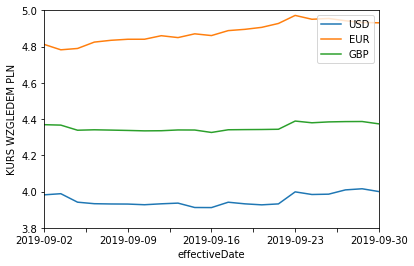

In [5]:
#rysujemy dane szeregow czasowych 3 walut na 1 wykresie
#okreslamy min osi Y dla poprawy widocznoscid danych
#df.plot.area(stacked=False);

df.plot(ylim=(3.8,5))
plt.ylabel('KURS WZGLEDEM PLN')

Obliczamy srednia kroczaca kursu walutowego dla EUR


Text(0, 0.5, 'KURS WZGLEDEM PLN')

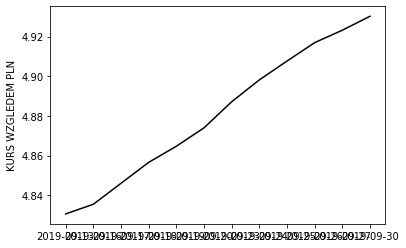

In [7]:
dane_wykres3.value_counts()

#print(dane_wykres3)

#Obliczamy srednia kroczaca
print("Obliczamy srednia kroczaca kursu walutowego dla EUR")
ma = dane_wykres3.rolling(10).mean()

plt.figure();
#price = pd.Series(dane_wykres3.cumsum(), index=pd.date_range('2019-09-02', periods=1, freq='B'))
#print(price)

#plt.plot(ma.index, ma, 'b')

#plt.yscale('log')
plt.plot(dane_wykres3.index, ma, 'k')
plt.ylabel('KURS WZGLEDEM PLN')

Obliczamy korelację Spearmana miedzy kursem GBP i EUR
0.6467532467532467
Obliczamy korelacje kursow GBP I EUR, generujemy wykres punktowy(matplotlib)


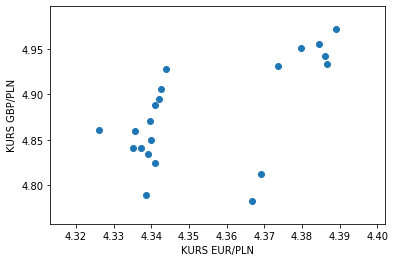

Obliczamy korelacje kursow GBP I EUR, generujemy wykres punktowy(seaborn)


Text(0.5, 0, 'KURS EUR/PLN')

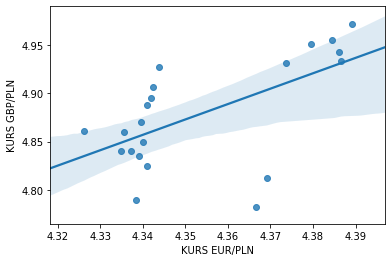

In [10]:
#Obliczamy korelację Spearmana miedzy kursem GBP i CHF
q=dane_wykres2.corr(dane_wykres3, method= 'spearman')
print("Obliczamy korelację Spearmana miedzy kursem GBP i EUR")
print(q)

#Obliczamy korelacje GBP I EUR, generujemy wykres punktowy
#czyli wykres rozproszenia, aby zbadać związek między tymi dwiema zmiennymi.
#korelacja dotyczy siły badanej współzależności

print("Obliczamy korelacje kursow GBP I EUR, generujemy wykres punktowy(matplotlib)")

#from matplotlib import pyplot
#korelacja na wykresie

plt.scatter(dane_wykres2, dane_wykres3)
plt.ylabel('KURS GBP/PLN')
plt.xlabel('KURS EUR/PLN')
plt.show()
print("Obliczamy korelacje kursow GBP I EUR, generujemy wykres punktowy(seaborn)")

sns.regplot(dane_wykres2, dane_wykres3)
plt.ylabel('KURS GBP/PLN')
plt.xlabel('KURS EUR/PLN')

Budujemy heatmape korelacje kursow USD, GBP, EUR


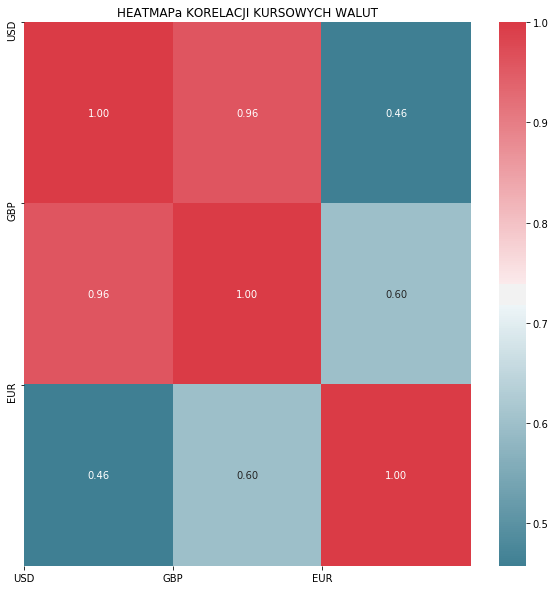

In [11]:
#ZBUDOWANIE HEATMAP korelacji dla 4 badanych kursow walut
import numpy as np

df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","GBP","EUR"])
df['USD'] = dane_wykres
df['GBP'] = dane_wykres2
df['EUR'] = dane_wykres3
corr=df.corr(method= 'pearson')

print("Budujemy heatmape korelacje kursow USD, GBP, EUR")

fig, ax = plt.subplots(figsize=(10, 10))
#Generowanie macierzy korelacji wyrazonej kolorami
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.title('HEATMAPa KORELACJI KURSOWYCH WALUT')
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

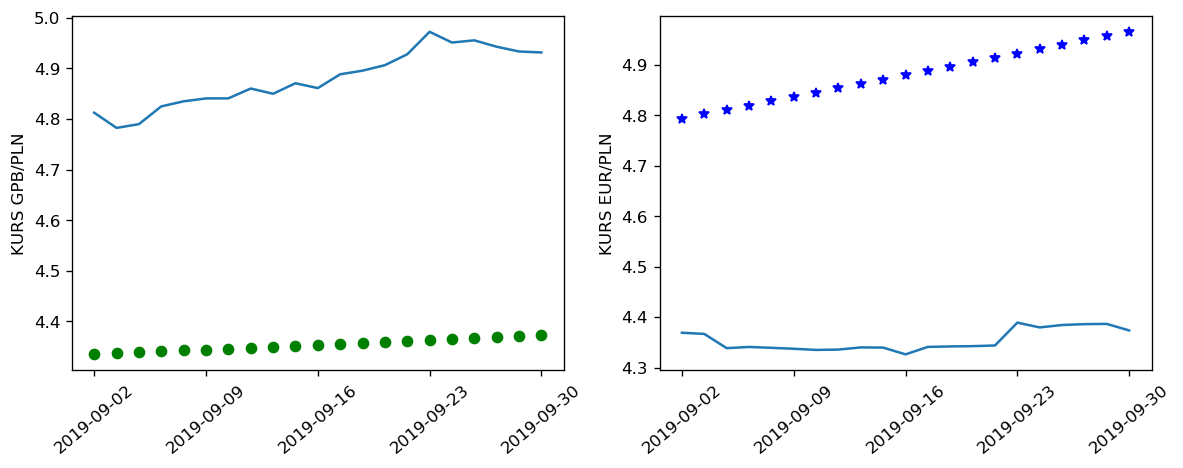

In [16]:
#generujemy linię regresji dla kursow EUR I USD
#regresja dotyczy charakteru zależności pomiędzy cechami.

plt.figure(figsize=(10,4), dpi=120) # 10 is width, 4 is height

x = np.arange(len(dane_wykres2), dtype=int)
a, b = np.polyfit(x, dane_wykres2, 1)

# matematyka, szkoła średnia
y = a*x+b

x2 = np.arange(len(dane_wykres3), dtype=int)
a2, b2 = np.polyfit(x2, dane_wykres3, 1)

# matematyka, szkoła średnia
y2 = a2*x2+b2

plt.subplot(1,2,1)  #ukladamy 2 wykresy obok siebie
plt.plot(x, y, 'go')
plt.ylabel('KURS GPB/PLN') # nadajmy nazwe osi Y
plt.plot(dane_wykres3)
plt.tight_layout()
plt.xticks((0, 5, 10, 15, 20)) #okreslamy gestosc oznaczen osi X 
plt.xticks(rotation=40)        #zmieniamy nachylenie tekstu pod osia X
plt.subplot(1,2,2)
plt.plot(x2, y2, 'b*')
plt.plot(dane_wykres2)
plt.ylabel('KURS EUR/PLN')

plt.tight_layout()
plt.xticks((0, 5, 10, 15, 20))
plt.xticks(rotation=40)
plt.show()

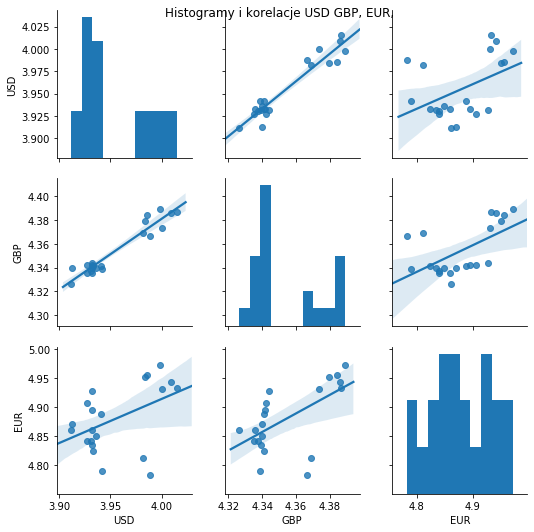

In [17]:


# REGRESJA, KORELACJA, DYSTRYBUCJA
#regresja dotyczy kształtu zależności pomiędzy cechami.
#scatter matrix czyli tzw.Macierz rozproszenia składa się z kilku par wykresów rozproszenia zmiennych przedstawionych
#w formacie macierzy. Można go użyć do ustalenia, czy zmienne są skorelowane i czy korelacja jest dodatnia czy ujemna.
import seaborn as sns
import pandas as pd
import numpy as np
 
df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","GBP","EUR"])
df['EUR'] = dane_wykres
df['GBP'] = dane_wykres2
df['EUR'] = dane_wykres3

#rysowanie wykresow w formie macierzowego zestawienia
g = sns.pairplot(df, kind="reg")
g.fig.suptitle("Histogramy i korelacje USD GBP, EUR,")
plt.show()



  effectiveDate     mid              no
0    2019-09-02  3.9819  169/A/NBP/2019
1    2019-09-03  3.9882  170/A/NBP/2019
2    2019-09-04  3.9414  171/A/NBP/2019
3    2019-09-05  3.9330  172/A/NBP/2019
4    2019-09-06  3.9315  173/A/NBP/2019
5    2019-09-09  3.9310  174/A/NBP/2019
6    2019-09-10  3.9273  175/A/NBP/2019


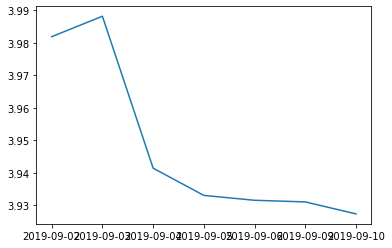

  effectiveDate     mid              no
0    2019-09-02  4.3691  169/A/NBP/2019
1    2019-09-03  4.3667  170/A/NBP/2019
2    2019-09-04  4.3385  171/A/NBP/2019
3    2019-09-05  4.3409  172/A/NBP/2019
4    2019-09-06  4.3392  173/A/NBP/2019
5    2019-09-09  4.3373  174/A/NBP/2019
6    2019-09-10  4.3350  175/A/NBP/2019


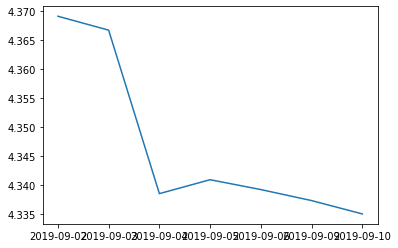



wykres korelacji tych dwóch walut ponizej 


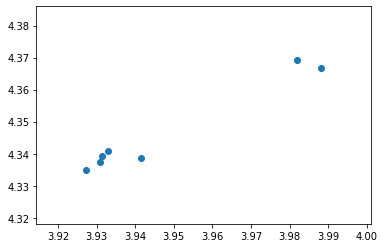

wykres linjowy tych dwóch walut ponizej 
- wartosci pionowe=wartosc waluty wzgledem PLN
wartosci poziome = wartosc w danym kolejnym dniu


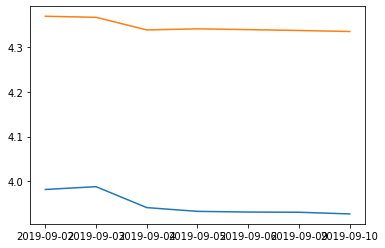

Text(0.5, 1.0, 'funkcja plt.subplot()')

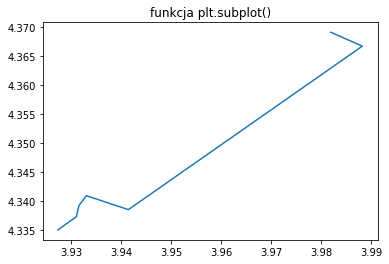

In [21]:
# ZADANIE W WERSJI UPRSZCZONEJ

#POBIERANIE BIBLIOTEK

import matplotlib.pyplot as plt
import numpy as np
import requests
import matplotlib.pyplot as plt

#TWORZENIE ZMIENNEJ ORAZ KLASY Z PARAMETRAMI 
currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/')
#tworze klase ze zmienna przkazujaca self przekazujaca za kazdym razemna nowo do klasy Waluty oraz
# currency_req
class Waluty():
    def __init__(self):
        self.ostatni_wynik = 0
    def dolar(self, currency_req):
        currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/USD/2019-09-01/2019-09-10/')
        currency_data = currency_req.json()
        wynik =  pd.DataFrame.from_dict(currency_data['rates'])
        
        
        print(wynik)
        dane_wykres = wynik.set_index(['effectiveDate'])['mid']
        plt.plot(dane_wykres)
        plt.show()

        
        
        
        
    def euro(self, currency_req):
        currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/EUR/2019-09-01/2019-09-10/')
        currency_data2 = currency_req.json()
        wynik2 =  pd.DataFrame.from_dict(currency_data2['rates'])
        
        print(wynik2)    
        dane_wykres2 = wynik2.set_index(['effectiveDate'])['mid']
        plt.plot(dane_wykres2)
        plt.show()
        
#tutaj wywoluje zmienne dla euro prypisuje notowanie2 , dla dolara notowanie
notowanie = Waluty()
notowanie.dolar(currency_req)


notowanie2 = Waluty()
notowanie2.euro(currency_req)


#------------------------------------------------------------------------------------------#
#WYKRESY 
    



currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/USD/2019-09-01/2019-09-10/')
currency_data = currency_req.json()

wynik = pd.DataFrame.from_dict(currency_data['rates'])

dane_wykres = wynik.set_index(['effectiveDate'])['mid']

currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/EUR/2019-09-01/2019-09-10/')
currency_data = currency_req.json()

wynik2 = pd.DataFrame.from_dict(currency_data['rates'])

dane_wykres2 = wynik2.set_index(['effectiveDate'])['mid']
    

    
    #print dla korelacji (dane_wykres, dane_wykres2)
print ("\n\nwykres korelacji tych dwóch walut ponizej ")

np.corrcoef(dane_wykres, dane_wykres2)
plt.scatter(dane_wykres, dane_wykres2)
plt.show()   


print ("wykres linjowy tych dwóch walut ponizej \n- wartosci pionowe=wartosc waluty wzgledem PLN\n"
      +"wartosci poziome = wartosc w danym kolejnym dniu")
dane_wykres = wynik.set_index(['effectiveDate'])['mid']
dane_wykres2 = wynik2.set_index(['effectiveDate'])['mid']
plt.plot(dane_wykres)
plt.plot(dane_wykres2)
plt.show()

# tutaj stosuje wykres dla funckji plt.subplot() - jednolinijowej z tendencja zwrotu ku wyzszej
# wartosci zmiennej 
x = dane_wykres
y = dane_wykres2

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('funkcja plt.subplot()')